# Assignment_2

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

> Task 1: Data Preprocessing

In [95]:

red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


In [96]:
# Add a column to identify the wine type
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [97]:
# Combine the datasets
wines = pd.concat([red_wine, white_wine], axis=0)

In [98]:
# Check for missing values
print("Missing values in the dataset:")
print(wines.isnull().sum())

Missing values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [99]:
# Basic statistics of the dataset
print("\nBasic statistics:")
print(wines.describe())


Basic statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000           

In [100]:
# Extract features and target variable
X = wines.drop(['quality', 'wine_type'], axis=1)
y = wines['quality']
wine_type = wines['wine_type']

In [101]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

> Task 2: PCA Implementation & Visualization

In [102]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [103]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [104]:
# Print variance explained by principal components
print(f"Explained variance by each component: {explained_variance_ratio}")
print(f"Cumulative explained variance: {cumulative_variance_ratio}")

Explained variance by each component: [0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016
 0.04755989 0.04559184 0.03063855 0.02069961 0.00298462]
Cumulative explained variance: [0.2754426  0.50215406 0.64364015 0.73187216 0.79731533 0.85252548
 0.90008537 0.94567722 0.97631577 0.99701538 1.        ]


Identify the variance explained by each principal component and discuss the
trade-off between dimensionality reduction and information loss.

The first two principal components capture 50.2% of the total variance, while the first three capture 64.4%, showing diminishing returns with each additional component. The trade-off involves balancing simplicity and interpretability (fewer dimensions) against information preservation (more dimensions). While reducing to 2-3 dimensions facilitates visualization and reduces computational complexity, we lose 35-50% of the information in the original dataset, potentially obscuring important patterns related to wine quality.

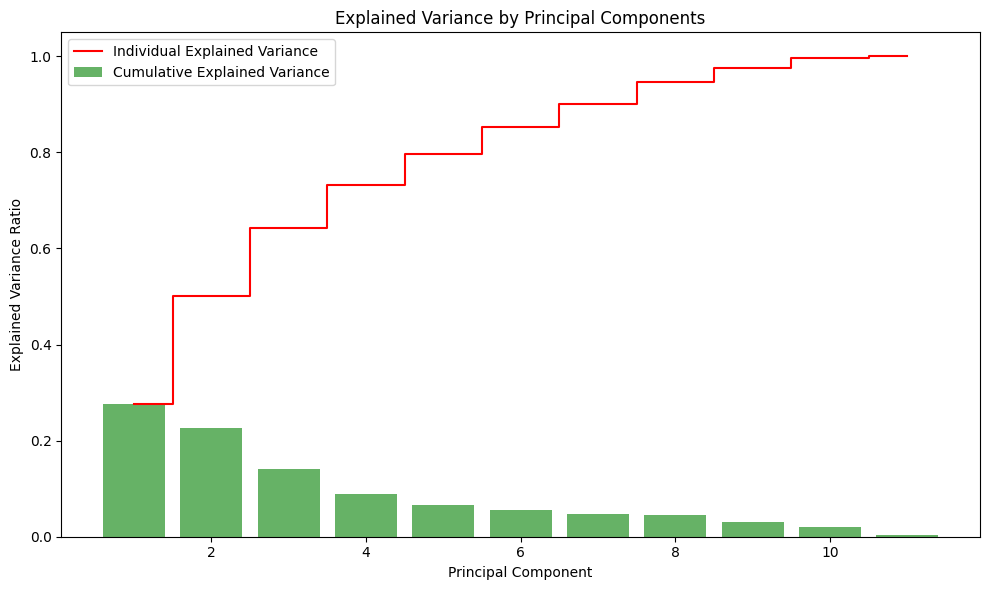

In [106]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, color='g')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', color='r')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(['Individual Explained Variance', 'Cumulative Explained Variance'])
plt.tight_layout()
plt.savefig('explained_variance.png')
plt.show()

This bar chart shows that the first principal component explains 27.5% of the variance, while the first two together explain 50.2%. The cumulative line indicates that we need around 5-6 components to capture 80% of the variance in the wine dataset.

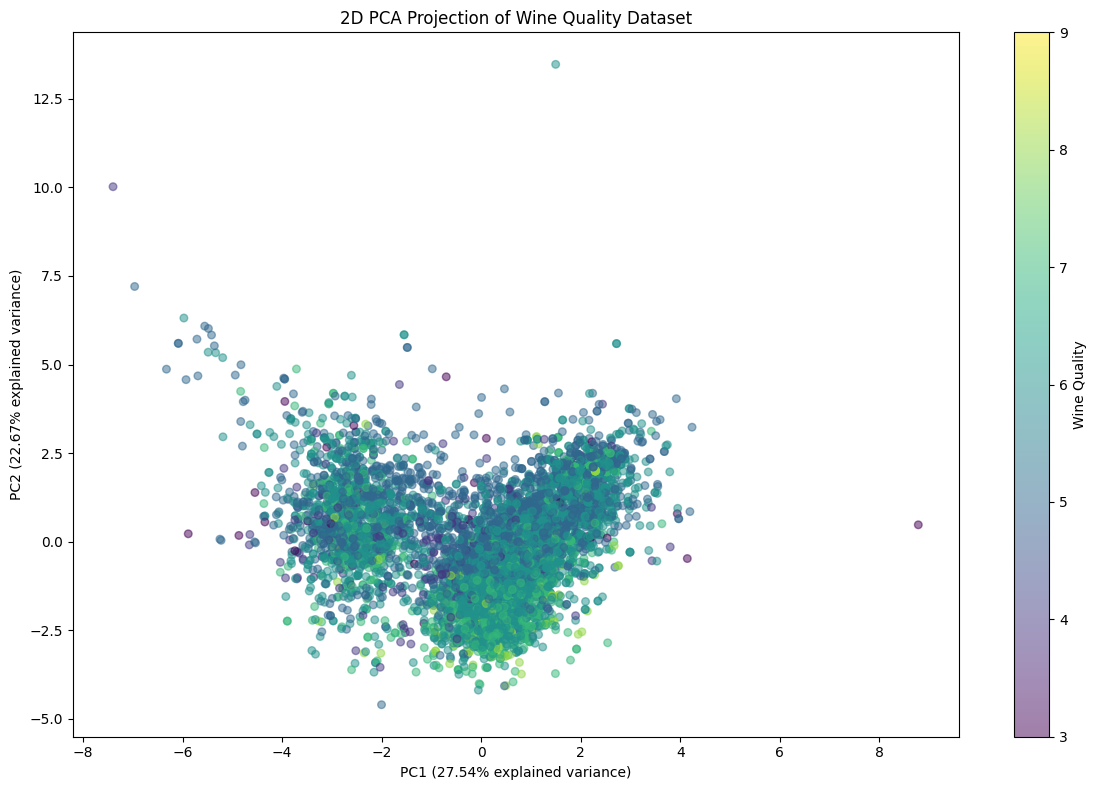

In [108]:
# Retain only the first 2 principal components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot 2D PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.5, s=30)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} explained variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} explained variance)')
plt.title('2D PCA Projection of Wine Quality Dataset')
plt.tight_layout()
plt.savefig('pca_2d.png')
plt.show()

This scatter plot shows the first two principal components with points colored by wine quality. We can see some gradual trends but no clear separation by quality, suggesting that quality depends on complex interactions of multiple features.

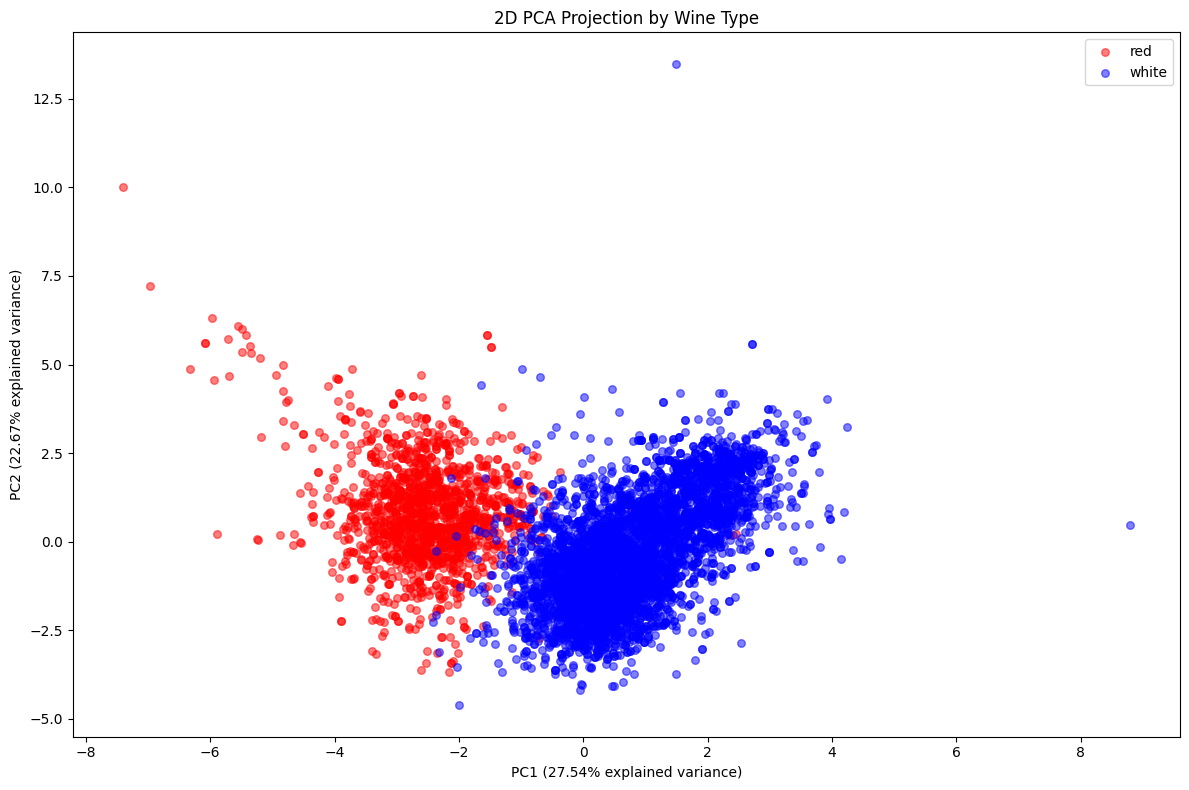

In [110]:
# Plot 2D PCA colored by wine type
plt.figure(figsize=(12, 8))
colors = {'red': 'r', 'white': 'b'}
for wine_t in wine_type.unique():
    mask = wine_type == wine_t
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
                c=colors[wine_t], label=wine_t, alpha=0.5, s=30)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} explained variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} explained variance)')
plt.title('2D PCA Projection by Wine Type')
plt.legend()
plt.tight_layout()
plt.savefig('pca_2d_wine_type.png')
plt.show()

This visualization clearly separates red wines (red points) from white wines (blue points) along the principal components. The distinct separation indicates that the chemical properties of red and white wines create consistent, distinguishable patterns in the feature space.

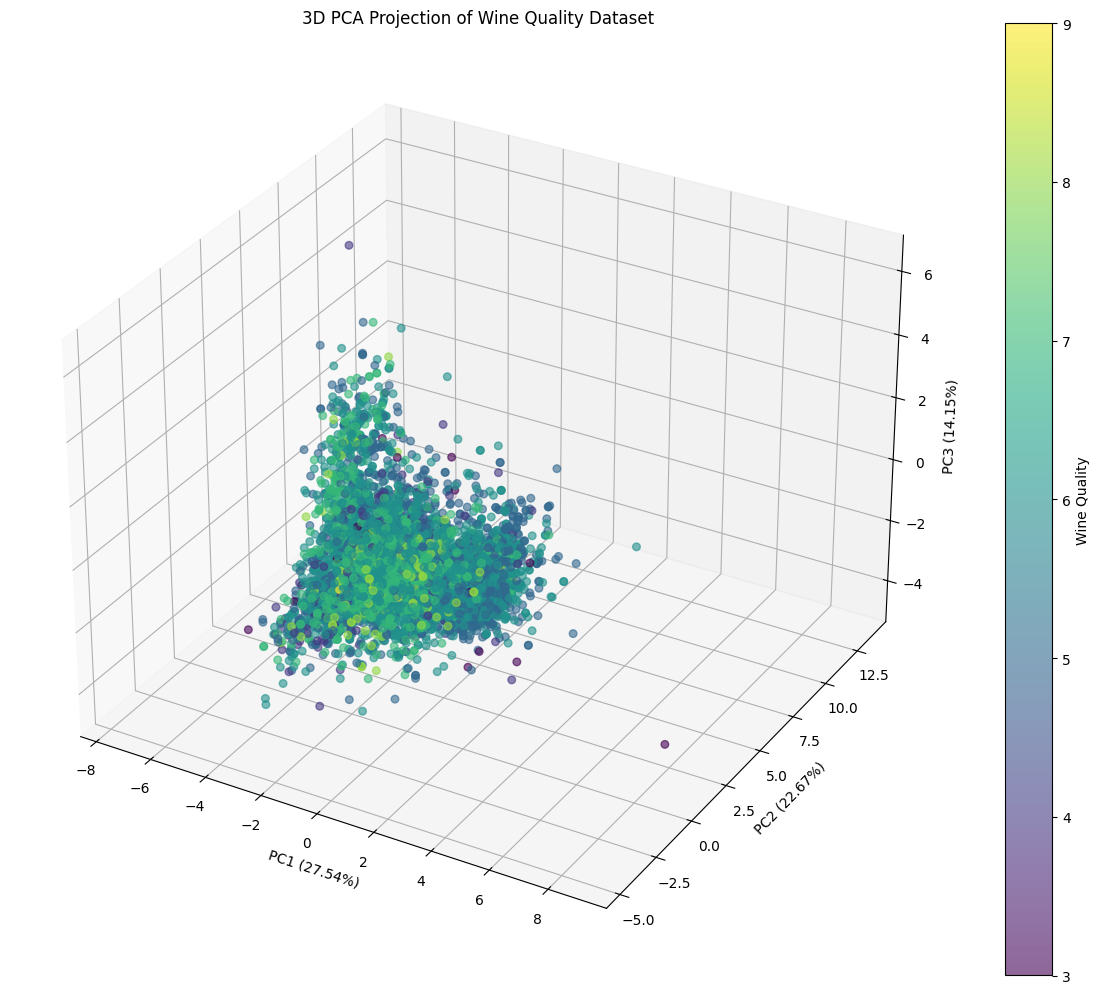

In [112]:
# Retain the first 3 principal components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Plot 3D PCA
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                    c=y, cmap='viridis', alpha=0.6, s=30)
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.2%})')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.2%})')
ax.set_zlabel(f'PC3 ({explained_variance_ratio[2]:.2%})')
ax.set_title('3D PCA Projection of Wine Quality Dataset')
plt.colorbar(scatter, ax=ax, label='Wine Quality')
plt.tight_layout()
plt.savefig('pca_3d.png')
plt.show()

The 3D projection adds a third principal component, capturing 64.4% of total variance. Wine quality is represented by color, showing slightly better separation than the 2D version but still with significant overlap between quality levels.

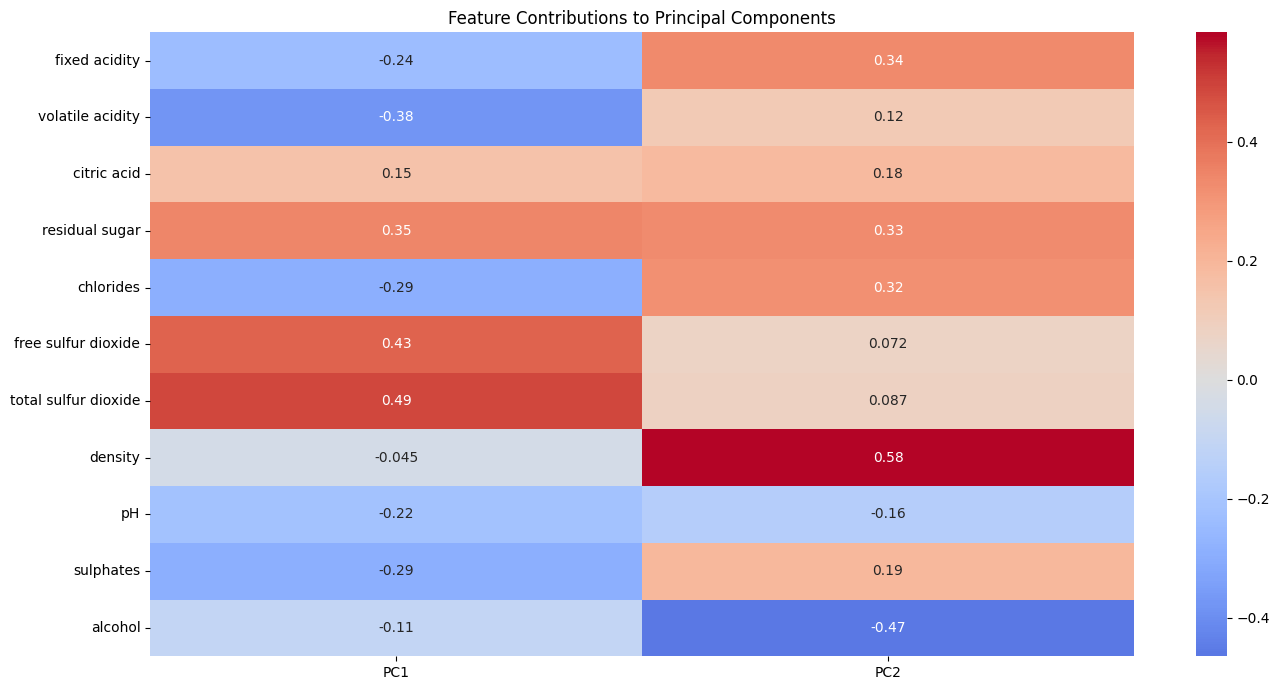

In [119]:
# Feature importance analysis
feature_names = X.columns
pca_components = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_names)

# Visualize the importance of each feature in the first two PCs
plt.figure(figsize=(14, 7))
sns.heatmap(pca_components.iloc[:, :2], annot=True, cmap='coolwarm', center=0)
plt.title('Feature Contributions to Principal Components')
plt.tight_layout()
plt.savefig('pca_feature_contributions.png')
plt.show()

This heatmap shows how strongly each original feature contributes to the first two principal components. We can see that density, alcohol, and total sulfur dioxide strongly influence PC1, while volatile acidity, fixed acidity, and pH drive PC2.

> Task 3 :  Comparison with t-SNE

c:\Users\sgpawar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


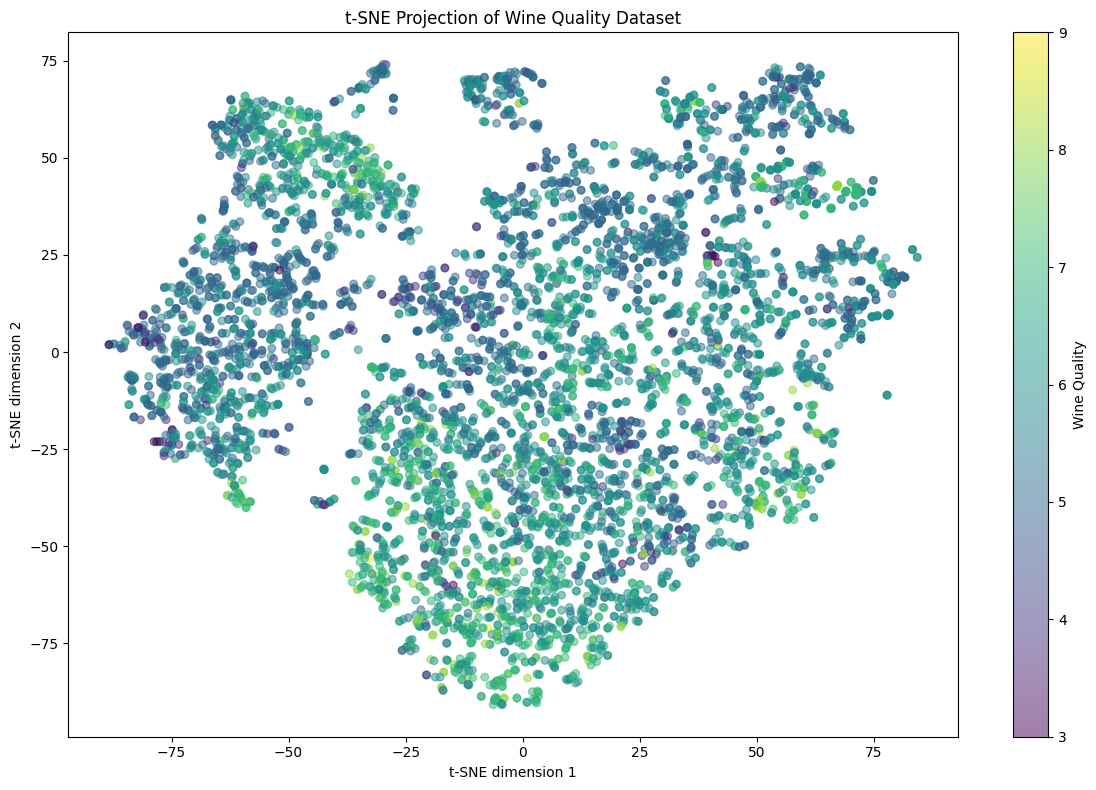

In [116]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results colored by quality
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.5, s=30)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE Projection of Wine Quality Dataset')
plt.tight_layout()
plt.savefig('tsne_quality.png')
plt.show()

The t-SNE plot reveals local clusters that weren't visible in PCA, with some correlation between neighboring points and wine quality. The non-linear mapping creates more distinct groupings while preserving local similarities in the data.

Compare the results with PCA in terms of interpretability and clustering

PCA maintains global structure and has interpretable axes related to original features, but shows less distinct clustering, particularly for wine quality. t-SNE reveals much clearer clusters and local structure, making it superior for visualization, but loses the direct relationship to original features and global distances. For this dataset, t-SNE better separates wine types and potentially quality-related clusters, while PCA better preserves the relationships between original chemical properties and the reduced dimensions.

In [120]:
# Save processed data and results
np.savez('pca_tsne_results.npz', 
         X_scaled=X_scaled, 
         X_pca_2d=X_pca_2d, 
         X_pca_3d=X_pca_3d, 
         X_tsne=X_tsne, 
         y=y, 
         wine_type=wine_type,
         explained_variance_ratio=explained_variance_ratio)

In [123]:
# Print summary of results
print("\nPCA Summary:")
print(f"Number of features in original dataset: {X.shape[1]}")
print(f"Explained variance by first 2 PCs: {cumulative_variance_ratio[1]:.2%}")
print(f"Explained variance by first 3 PCs: {cumulative_variance_ratio[2]:.2%}")


PCA Summary:
Number of features in original dataset: 11
Explained variance by first 2 PCs: 50.22%
Explained variance by first 3 PCs: 64.36%


Discuss how PCA and t-SNE handle high-dimensional data differently.

PCA handles high-dimensional data through linear projections that maximize variance, preserving global structure but potentially missing non-linear relationships. t-SNE focuses on preserving local neighborhoods through probability-based similarity, capturing non-linear manifolds but losing global structure and feature interpretability. PCA is deterministic and computationally efficient, making it suitable for further analysis, while t-SNE is stochastic and computationally intensive, making it better for exploratory visualization. Their complementary approaches suggest using PCA for understanding feature relationships and t-SNE for revealing hidden clusters in complex datasets like wine quality.